<a href="https://murmuration-sas.com/" target="_blank">
    <img src="https://murmuration-sas.com/wp-content/uploads/2017/05/Logo-murmuration-vert.png" alt="Murmuration" style="width: 100px" align="right" />
</a>


# Aquatic Coverage
____________

<p style="text-align: right"> Tutorial created by - Emma Rizzi</p>

## Data Source

Aquatic Coverage uses Water Bodies data from Copernicus Land:
- Source : https://land.copernicus.eu/global/products/wb)
- Temporal resolution : monthly, oct 2020 - today
- Spatial resolution : 100m / global
- Variables : WB (Water Bodies detection), QUAL (Water occurence information)

## Dependencies
- xarray

## Demonstration


First, we access the data stored on the public S3 bucket through Xarray. 

Then, we select a small area using coordinates. To find the coordinates of a bounding box, you can use this tool : http://bboxfinder.com

Finally we plot the QUAL variable, showing water occurrence over the last months.

In [ ]:
import xarray as xr
import fsspec
data = xr.open_zarr(fsspec.get_mapper("https://storage.gra.cloud.ovh.net/v1/AUTH_0c2c27fc2c8b4a7d97a35ea0e2911f9b/murmuration-cassini/aquatic-coverage/water-bodies.zarr"))

In [ ]:
data


In [ ]:
min_lon, min_lat, max_lon, max_lat = 4.374619,43.564269,4.559326,43.636846

sel=data.sel(lon=slice(min_lon,max_lon), lat=slice(min_lat,max_lat)).chunk('auto')


### Parc Naturel Regional de Camargue

The selected areas show the monthly evolution of water coverage (light blue) in rice cultures.

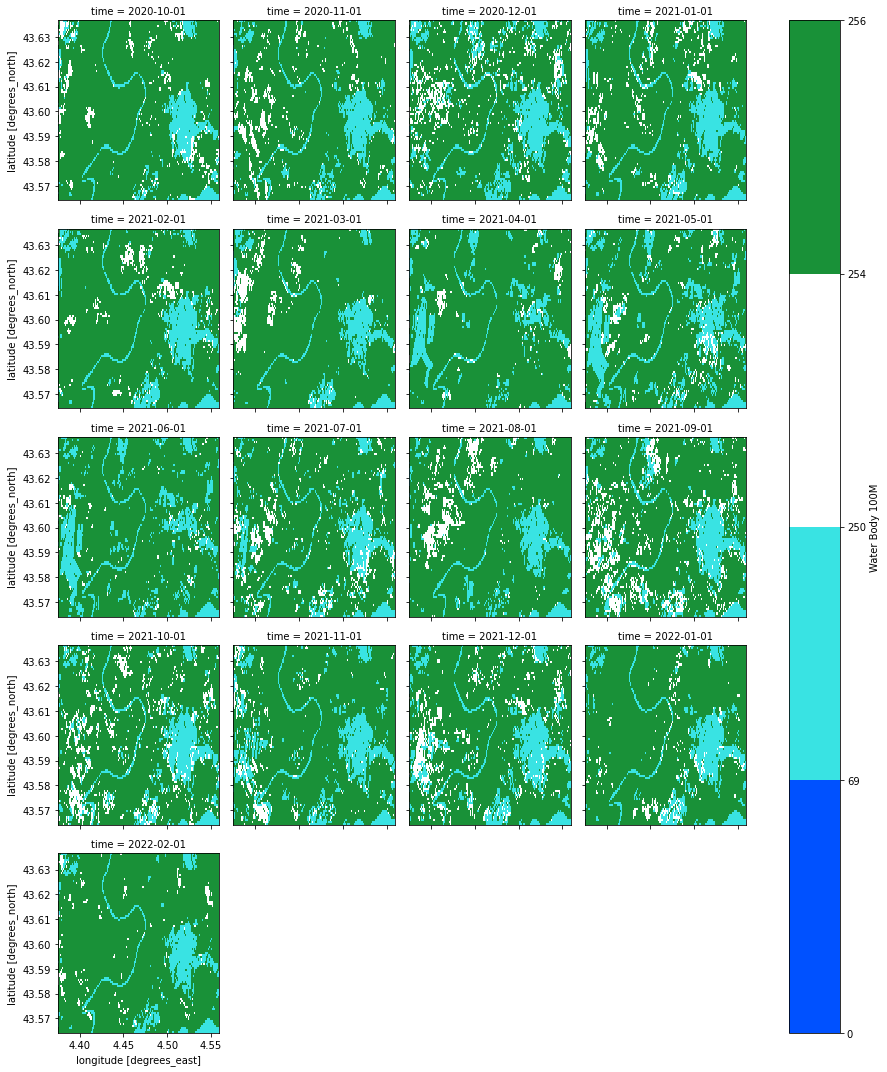

In [4]:
#sea, water, no data, no water
#blue, cyan, white, green
colors = ["#0051ff", "#39e3e3", "#ffffff", "#199138"]
levels = [0, 69, 250, 254, 256]
sel.WB.plot(x="lon", y="lat", col="time", col_wrap=4, levels=levels, colors=colors)
